In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import os

In [173]:
combined = pd.read_excel('matingtimes.xlsx')

In [174]:
combined

,Replicate,Treatment,MatingCall/NormalCall,Label
0,1,0.0,0.005952,45182
1,1,0.0,0.045614,45182
2,1,0.0,0.339844,45182
3,1,0.0,0.409091,45182
4,1,0.0,0.052768,45183
...,...,...,...,...
75,1,10.0,0.380952,Folder 25
76,1,10.0,0.333333,Folder 26
77,1,10.0,0.023810,Folder 26
78,1,10.0,0.011905,Folder 26


   Treatment  Replicate  MatingCall/NormalCall
0       0.00          1               0.135309
1       0.01          1               0.166846
2       1.00          1               0.189183
3      10.00          1               0.340437
Treatment     0.00      0.01      1.00      10.00
Replicate                                        
1          0.135309  0.166846  0.189183  0.340437


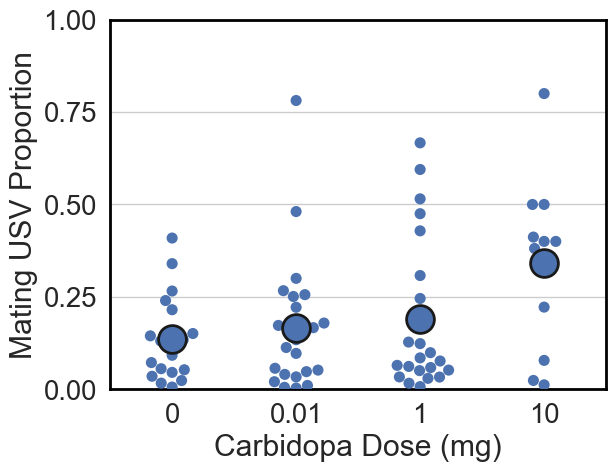

In [199]:
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib

# Set the style for seaborn plots
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.8)  # 替换为你想要的字体缩放比例

# plt.figure(frameon=True, edgecolor='black', linewidth=2)

# Calculate averages grouped by Treatment and Replicate
ReplicateAverages = combined.groupby(['Treatment', 'Replicate'], as_index=False).agg({'MatingCall/NormalCall': "mean"})
print(ReplicateAverages)

# Pivot the averages for better visualization
ReplicateAvePivot = ReplicateAverages.pivot_table(columns='Treatment', values='MatingCall/NormalCall', index="Replicate")
print(ReplicateAvePivot)

# Perform a paired t-test
# statistic, pvalue = scipy.stats.ttest_rel(ReplicateAvePivot['Control'], ReplicateAvePivot['Drug'])
# P_value = str(round(pvalue, 3))

# Create a swarmplot to show data distribution
sns.swarmplot(x="Treatment", y="MatingCall/NormalCall", hue="Replicate", data=combined, size=8)

# Create a swarmplot with customized aesthetics
ax = sns.swarmplot(x="Treatment", y="MatingCall/NormalCall", hue="Replicate", size=20, edgecolor="k", linewidth=2, data=ReplicateAverages)

# 设置 y 轴范围
ax.set_ylim(0, 1)  # 替换为实际的 y 范围

# 设置坐标轴的边框样式
for spine in ax.spines.values():
    spine.set_visible(True)  # 设置坐标轴边框可见
    spine.set_linewidth(2)  # 设置坐标轴边框线宽
    spine.set_edgecolor('black')  # 设置坐标轴边框颜色

# 设置 x 轴和 y 轴标签
ax.set_xlabel("Carbidopa Dose (mg)")  # 替换为实际的 x 轴标签
ax.set_ylabel("Mating USV Proportion")  # 替换为实际的 y 轴标签

# 设置 x 轴和 y 轴刻度
ax.set_xticks(range(len(ReplicateAvePivot.columns)))  # 设置 x 轴刻度位置
ax.set_xticklabels(['0', '0.01', '1', '10'])  # 设置 x 轴刻度标签
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])  # 设置 y 轴刻度位置

# Remove legend from the plot
ax.legend_.remove()

# Indicate the significance level
# x1, x2 = 0, 1
# y, h, col = combined['MatingCall/NormalCall'].max() + 2, 2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h*2, "P = " + P_value, ha='center', va='bottom', color=col)

# Show the plot
plt.show()


In [187]:
data_group1 = combined.loc[combined['Treatment'] == 0]['MatingCall/NormalCall'].values

In [188]:
data_group1

array([0.00595238, 0.04561404, 0.33984375, 0.40909091, 0.05276817,
       0.2151463 , 0.02351485, 0.26582278, 0.24      , 0.15290934,
       0.15076336, 0.05555556, 0.01656315, 0.07216495, 0.13402062,
       0.14448669, 0.13057325, 0.09189189, 0.12436975, 0.03512881])

In [197]:
import numpy as np
import scipy.stats as stats

# 两组数据
data_group1 = combined.loc[combined['Treatment'] == 1]['MatingCall/NormalCall'].values
data_group2 = combined.loc[combined['Treatment'] == 10]['MatingCall/NormalCall'].values

# 计算 t 检验
t_statistic, p_value = stats.ttest_ind(data_group1, data_group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# 根据 P 值判断是否具有统计显著性
alpha = 0.05  # 设置显著性水平
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

T-statistic: -2.084758893776039
P-value: 0.04467283582061016
The difference is statistically significant.
